Feature engineering refers to using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling.

Using Feature Engineering try the algorithms you discovered and apply them to the previous Data Sets

In [2]:
# import the libraries 
import numpy as np
import pandas as pd

# import libraries for plot creating
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# import the dataset
df = pd.read_csv("pokemon.csv")

In [6]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


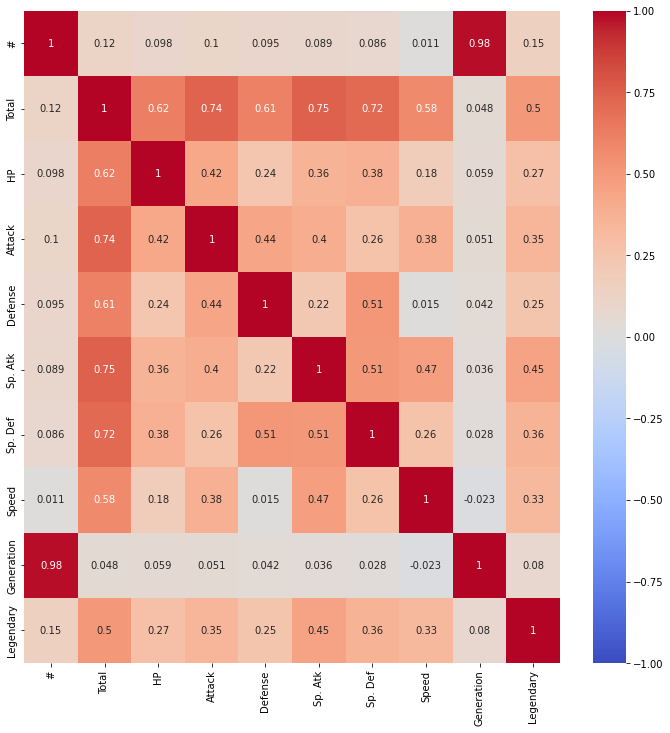

In [7]:
plt.figure(figsize = (12, 12))

sns.heatmap(df[["#","Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation", "Legendary"]].corr(),
            vmin = -1,
            cmap = 'coolwarm',
            annot = True);

### Feature Scaling

In [27]:
df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65
...,...,...,...,...,...,...
795,50,100,150,100,150,50
796,50,160,110,160,110,110
797,80,110,60,150,130,70
798,80,160,60,170,130,80


In [15]:
# scale 'Total' column to range of 0 to 1
df['Total'] = df['Total'] / df['Total'].max()

# feature scaling for numerical columns
numeric_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].mean()) / pokemon_df[numeric_cols].std()

# print first 5 rows of the transformed data
print(df.head())


   #                   Name     Total          HP      Attack     Defense  \
0  1              Bulbasaur  0.407692 -241.308101 -171.000668 -179.247435   
1  2                Ivysaur  0.519231  -92.099196  -96.903466  -78.232477   
2  3               Venusaur  0.673077  106.846010   17.092230   66.074606   
3  3  VenusaurMega Venusaur  0.801282  106.846010  119.688356  354.688771   
4  4             Charmander  0.396154 -300.991663 -153.901314 -222.539560   

      Sp. Atk     Sp. Def       Speed  Generation  ...  Type 2_Ghost  \
0  -43.972467  -52.087009 -140.175365           1  ...             0   
1   40.373697   61.104608  -49.846486           1  ...             0   
2  152.835250  212.026765   70.592019           1  ...             0   
3  276.542957  362.948922   70.592019           1  ...             0   
4  -72.087855 -165.278627  -19.736860           1  ...             0   

   Type 2_Grass  Type 2_Ground  Type 2_Ice  Type 2_Normal  Type 2_Poison  \
0             0             

### Feature Normalization (MinMaxSlaer)

In [14]:
# librari for normalization between 0 and 1
from sklearn.preprocessing import MinMaxScaler

# select the numerical columns for normalization
numeric_cols = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
numeric_data = df[numeric_cols]

# apply min-max normalization
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_data)

# create a new dataframe with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

# merge the scaled dataframe with the original dataframe
pokemon_df = pd.concat([df.drop(numeric_cols, axis=1), scaled_df], axis=1)

# print first 5 rows of the transformed data
print(pokemon_df.head())


   #                   Name  Generation  Legendary  Type 1_Bug  Type 1_Dark  \
0  1              Bulbasaur           1      False           0            0   
1  2                Ivysaur           1      False           0            0   
2  3               Venusaur           1      False           0            0   
3  3  VenusaurMega Venusaur           1      False           0            0   
4  4             Charmander           1      False           0            0   

   Type 1_Dragon  Type 1_Electric  Type 1_Fairy  Type 1_Fighting  ...  \
0              0                0             0                0  ...   
1              0                0             0                0  ...   
2              0                0             0                0  ...   
3              0                0             0                0  ...   
4              0                0             0                0  ...   

   Type 2_Rock  Type 2_Steel  Type 2_Water     Total        HP    Attack  \
0         

### Feature Standardization

In [11]:
from sklearn.preprocessing import StandardScaler

# load data
pokemon_df = pd.read_csv('pokemon.csv')

# select the numerical columns for standardization
numeric_cols = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
numeric_data = pokemon_df[numeric_cols]

# apply standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# create a new dataframe with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

# merge the scaled dataframe with the original dataframe
pokemon_df = pd.concat([pokemon_df.drop(numeric_cols, axis=1), scaled_df], axis=1)

# print first 5 rows of the transformed data
print(pokemon_df.head())

   #                   Name Type 1  Type 2  Generation  Legendary     Total  \
0  1              Bulbasaur  Grass  Poison           1      False -0.976765   
1  2                Ivysaur  Grass  Poison           1      False -0.251088   
2  3               Venusaur  Grass  Poison           1      False  0.749845   
3  3  VenusaurMega Venusaur  Grass  Poison           1      False  1.583957   
4  4             Charmander   Fire     NaN           1      False -1.051836   

         HP    Attack   Defense   Sp. Atk   Sp. Def     Speed  
0 -0.950626 -0.924906 -0.797154 -0.239130 -0.248189 -0.801503  
1 -0.362822 -0.524130 -0.347917  0.219560  0.291156 -0.285015  
2  0.420917  0.092448  0.293849  0.831146  1.010283  0.403635  
3  0.420917  0.647369  1.577381  1.503891  1.729409  0.403635  
4 -1.185748 -0.832419 -0.989683 -0.392027 -0.787533 -0.112853  


### DummyVariable

In [18]:
# select the categorical columns for creating dummy variables
cat_cols = ['Type 1', 'Type 2', 'Generation', 'Legendary']
cat_data = df[cat_cols]

# create dummy variables for the categorical data
dummy_df = pd.get_dummies(cat_data)

# merge the dummy dataframe with the original dataframe
dum_poke_df = pd.concat([df.drop(cat_cols, axis=1), dummy_df], axis=1)

# print first 5 rows of the transformed data
print(dum_poke_df.head())


   #                   Name  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1              Bulbasaur    318  45      49       49       65       65   
1  2                Ivysaur    405  60      62       63       80       80   
2  3               Venusaur    525  80      82       83      100      100   
3  3  VenusaurMega Venusaur    625  80     100      123      122      120   
4  4             Charmander    309  39      52       43       60       50   

   Speed  Generation  ...  Type 2_Ghost  Type 2_Grass  Type 2_Ground  \
0     45           1  ...             0             0              0   
1     60           1  ...             0             0              0   
2     80           1  ...             0             0              0   
3     80           1  ...             0             0              0   
4     65           1  ...             0             0              0   

   Type 2_Ice  Type 2_Normal  Type 2_Poison  Type 2_Psychic  Type 2_Rock  \
0           0              0

### Box-Cox Transformer

In [19]:
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

# load data
pokemon_df = pd.read_csv('pokemon.csv')

# select the numerical columns for Box-Cox transformation
numeric_cols = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
numeric_data = pokemon_df[numeric_cols]

# define the Box-Cox transformer for the numerical data
boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)

# apply Box-Cox transformation to the numerical data
transformed_data = boxcox_transformer.fit_transform(numeric_data)

# create a new dataframe with the transformed data
transformed_df = pd.DataFrame(transformed_data, columns=numeric_cols)

# merge the transformed dataframe with the original dataframe
pokemon_box_df = pd.concat([pokemon_df.drop(numeric_cols, axis=1), transformed_df], axis=1)

# print first 5 rows of the transformed data
print(pokemon_box_df.head())


   #                   Name Type 1  Type 2  Generation  Legendary       Total  \
0  1              Bulbasaur  Grass  Poison           1      False   69.756906   
1  2                Ivysaur  Grass  Poison           1      False   82.313076   
2  3               Venusaur  Grass  Poison           1      False   98.258473   
3  3  VenusaurMega Venusaur  Grass  Poison           1      False  110.641973   
4  4             Charmander   Fire     NaN           1      False   68.397121   

          HP     Attack    Defense    Sp. Atk    Sp. Def      Speed  
0   8.943886  14.049631   8.300129   9.043637   8.300086  15.630829  
1  10.337151  16.285033   9.326152   9.905108   9.045306  19.019259  
2  11.899968  19.354830  10.560612  10.899678   9.899403  23.073918  
3  11.899968  21.845370  12.541397  11.850347  10.640764  23.073918  
4   8.308200  14.586578   7.801458   8.727113   7.422196  20.075329  


### ZCA Transformation

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.utils.extmath import randomized_svd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('pokemon.csv')

X = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

X_zca = np.dot(pca.transform(X_scaled), pca.components_)

df_zca = pd.DataFrame(X_zca, columns=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])



def zca_whitening(X):
    X = StandardScaler().fit_transform(X)
    U, S, V = randomized_svd(X.T.dot(X), n_components=X.shape[1])
    X_zca = U.dot(np.diag(1.0/np.sqrt(S + 1e-5))).dot(U.T).dot(X.T).T
    return X_zca

X_zca = zca_whitening(X)
df_zca = pd.DataFrame(X_zca, columns=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
print(df_zca)


           HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
0   -0.029829 -0.019073 -0.026393  0.006034  0.006116 -0.027758
1   -0.013554 -0.014840 -0.014612  0.013035  0.016906 -0.012568
2    0.007537 -0.005993  0.002103  0.021996  0.031038  0.007265
3   -0.003109  0.004288  0.043908  0.042960  0.043668  0.001202
4   -0.035668 -0.017433 -0.025999 -0.000843 -0.015545  0.001869
..        ...       ...       ...       ...       ...       ...
795 -0.054789  0.018700  0.062876  0.016257  0.099482 -0.036476
796 -0.065976  0.085042  0.016014  0.084954  0.030303  0.018230
797 -0.011768  0.038802 -0.053121  0.077777  0.078711 -0.033438
798 -0.025479  0.101685 -0.067258  0.094672  0.076578 -0.036060
799 -0.000407  0.016976  0.048032  0.065387 -0.004565 -0.013871

[800 rows x 6 columns]


C:\Python310\lib\site-packages\sklearn\utils\extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


### Advanced Imperio Methods: Categorical features.

### Frequency Imputation

In [33]:
# create the data frame
df = pd.DataFrame({
    'HP': [45, 60, 80, 80, 39, 58, 78, 78, np.nan, 30, 55, 40, 65, 50, np.nan],
    'Attack': [49, 62, 82, 100, 52, 64, 84, 130, np.nan, 56, 81, 65, 90, 72, np.nan],
    'Defense': [49, 63, 83, 123, 43, 58, 78, 111, np.nan, 30, 60, 40, 55, 65, np.nan],
    'Sp. Atk': [65, 80, 100, 122, 60, 80, 109, 130, np.nan, 40, 50, 45, 85, 74, np.nan],
    'Sp. Def': [65, 80, 100, 120, 50, 65, 85, 85, np.nan, 50, 70, 30, 75, 53, np.nan],
    'Speed': [45, 60, 80, 80, 65, 80, 100, 100, np.nan, 20, 45, 55, 90, 59, np.nan]
})

# df = pd.read_csv('pokemon.csv')

# calculate the mode of each column
mode = df.mode().iloc[0]

# fill missing values with the mode of each column
df = df.fillna(mode)

print(df)


      HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0   45.0    49.0     49.0     65.0     65.0   45.0
1   60.0    62.0     63.0     80.0     80.0   60.0
2   80.0    82.0     83.0    100.0    100.0   80.0
3   80.0   100.0    123.0    122.0    120.0   80.0
4   39.0    52.0     43.0     60.0     50.0   65.0
5   58.0    64.0     58.0     80.0     65.0   80.0
6   78.0    84.0     78.0    109.0     85.0  100.0
7   78.0   130.0    111.0    130.0     85.0  100.0
8   78.0    49.0     30.0     80.0     50.0   80.0
9   30.0    56.0     30.0     40.0     50.0   20.0
10  55.0    81.0     60.0     50.0     70.0   45.0
11  40.0    65.0     40.0     45.0     30.0   55.0
12  65.0    90.0     55.0     85.0     75.0   90.0
13  50.0    72.0     65.0     74.0     53.0   59.0
14  78.0    49.0     30.0     80.0     50.0   80.0


### Target Imputation

Target imputation is a technique where missing values in a column are imputed using the values from another column that is highly correlated with the missing column. In order to implement this, you would need to identify which columns are highly correlated, and then use the non-missing values in the highly correlated column to impute the missing values in the target column.

In [67]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv("pokemon.csv")

# Split the data into training and test sets
X = data.drop("HP", axis=1)
y = data["HP"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in the training set
imputer = SimpleImputer(strategy="most_frequent")
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Impute missing values in the test set using most frequent value from the training set
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Check if there are any missing values left
print(X_train_imputed.isnull().sum())
print(X_test_imputed.isnull().sum())


#             0
Name          0
Type 1        0
Type 2        0
Total         0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64
#             0
Name          0
Type 1        0
Type 2        0
Total         0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64
